## Case Study 1 DS7333 

## Business Understanding

The objective behind this case study is to build a linear regression modeling using L1 (LASSO) or L2 (Ridge) regularization to predict the cirtical temperature.  The team was given two files which contain the data and from this data we must attempt to predict the cirtical temperature.  

Our overall goals are to predict critical temperature and to describe which variable carries the most importance.

## Data Evaluation/ Engineering 

In [1]:
#First we'll import all our necessary libraries and add addtional ones as needed as the project grows
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ml_metrics import rmse
import matplotlib.pyplot as plt
from sklearn import datasets
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import Ridge

In [2]:
#Next we'll bring in our data
dat1 = pd.read_csv("unique_m.csv")
dat2 = pd.read_csv("train.csv")

#Drop critical temp
dat1.drop(['critical_temp'], axis=1)

#Merge the data
frames = [dat1,dat2]
result = pd.concat(frames)

In [3]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42526 entries, 0 to 21262
Columns: 169 entries, H to wtd_std_Valence
dtypes: float64(168), object(1)
memory usage: 55.2+ MB


In [4]:
result.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,...,3.198228,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,...,1.044611,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,2.333333,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,2.833333,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,4.000000,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.000000,0.0,...,7.000000,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000


In [5]:
pd.set_option('display.max_rows', None)
#Check out the data, start to make some decisions on columns and missing data
#Compute percentages of each columns missing data
percent_missing = result.isnull().sum()/len(result)
#Put percents into dfReduced
missing_value_result = pd.DataFrame({'column_name': result.columns,
'percent_missing': percent_missing})
#Sort it and show the results
missing_value_result.sort_values('percent_missing', inplace=True)
missing_value_result.round(6)

,column_name,percent_missing
critical_temp,critical_temp,0.0
H,H,0.5
wtd_std_fie,wtd_std_fie,0.5
mean_atomic_radius,mean_atomic_radius,0.5
wtd_mean_atomic_radius,wtd_mean_atomic_radius,0.5
gmean_atomic_radius,gmean_atomic_radius,0.5
wtd_gmean_atomic_radius,wtd_gmean_atomic_radius,0.5
entropy_atomic_radius,entropy_atomic_radius,0.5
wtd_entropy_atomic_radius,wtd_entropy_atomic_radius,0.5
range_atomic_radius,range_atomic_radius,0.5


Based on the analysis above, we are lucky and have no missing values to impute/handle.  Additionally, we will check for NaN's in the combined dataframe.

In [6]:
result.isnull().values.any()


True

In [7]:
result= result.fillna(0)

We are again lucky as our combined dataframe does not contain any NaN's.  

In [8]:
print(len(result))
result.drop_duplicates(keep = False, inplace = True)
print(len(result))

42526
42395


In a seperate check for duplicate entries- we can see that we have no duplicates.

Based on the results above- this data is ready for analysis.  It is free of duplicates, NaN's, and missing values. 


With those items stated- we should also discuss that we are soely interested in our outcome variable 

### EDA

(array([2100., 2262., 2336., 1994., 1664., 1418., 1212., 1088.,  870.,
         850.,  772.,  610.,  610.,  588.,  573.,  550.,  466.,  646.,
         366.,  496.,  378.,  382.,  372.,  314.,  402.,  460.,  352.,
         368.,  488.,  338.,  400.,  316.,  308.,  366.,  276.,  340.,
         360.,  220.,  310.,  192.,  148.,  166.,  136.,  246.,  114.,
         164.,  120.,  132.,  238.,  142.,  252.,  122.,  216.,  142.,
         138.,  168.,  130.,  218.,  138.,  160.,  158.,  174.,  192.,
         154.,  168.,  180.,  132.,  258.,  180.,  212.,  254.,  214.,
         258.,  256.,  232.,  430.,  432.,  252.,  314.,  242.,  288.,
         308.,  350.,  268.,  318.,  342.,  492.,  526.,  486.,  380.,
         208.,  152.,  110.,   68.,   68.,   32.,   78.,   20.,   46.,
          50.,   94.,   80.,  110.,   88.,   74.,  118.,   50.,   46.,
          30.,   34.,   44.,   48.,   54.,   44.,   20.,   58.,   20.,
          30.,   28.,   24.,   24.,   18.,   28.,   40.,   36.]),
 array([  0

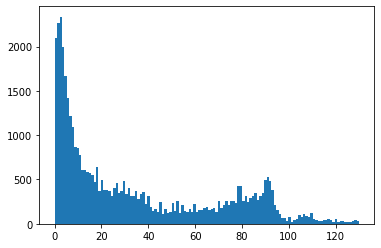

In [9]:
plt.hist(result['critical_temp'],bins=125, range=(0, 130))

The purpose of the plot above was to investigate the distribution of values of our outcome variable.  Based on this histogram we can see that the data is heavily right skewed.  This may be worth log-transforming to fit our normality assumption.

## Modeling Preparations

The following evaluation metrics will be used for the regression task. -Mean Absolute Error (MAE) -Root Mean Squared Error (RMSE) -Mean Absolute Percentage Error (MAPE) and R^2

Mean absolute error is being used because it is an intuitive metric that simply looks at the absolute difference between the data and the models preditions. This metric is a good first pass at evaluating a models performance, its simple and quick. The mean absolute error however, does not indicate under/over performance in the model. The residuals all contribute proportionally, so larger errors will contribute significantally to the model. A small MAE is a good indicator of good prediction and a large MAE indicates the model may need more work. MAE of 0 is ideal, but not really possible. The MAE is farily robust to outliers since it uses the absolute value. For this model a lower MAE is "better." This metric is appropriate since we are concerned with the models ability to predict critical temperatures.

Root mean squared error is the standard deviation of the residuals (commonly known as prediction errrors). We use these rediuals to see how far from the line the points are. RMSE is a good metric to tell us how concentrated the data is around the line of best fit. The nice and differentiating part of RMSE is that they can be positive or negative as the predicted value under or over the estimates of the actual value unlike the MAE and MAPE which use the absolute value. Additionally we can use the RMSE as a good measure of the spread of the y values about the predicted y values.

Mean absolute percentage error is being used as the percentage equivalent of MAE. Similarily to the MAE, MAPE measures how far our model's predictions are off from their corresponding outputs on average. MAPE is pretty easy to interpret because of its use of percentages. As a downside, MAPE is undefined for data where we have 0 values. The MAPE can also grow very large if the values themselves are small, and as a final note MAPE is biased towards predictions that are systematically less than actual values. We will use MAPE as a more interpretable MAE.
We will interpret the MAPE in terms of percentages, as an example the MAPE will state, "our model's predictions are on average xx% off from the actual value." This metric is appropriate since we are concerned with the model's ability to predict critical temperatures, furthermore the addition of percentage will further our ability to interpret the model's performance.

Finally R2 or the coefficient of determination will be used and is the proportion of the variation in the dependent variable that is predictable from the independent variable.  This isn't the best metric, but it is quite easy to interpret as it lives in a 0-100% scale.  


## Model Building & Evaluations

### Start with Linear Regression Model

In [10]:
# Create training and testing sets (cross-validation not needed)
train_set = result.sample(frac=0.7, random_state=100)
test_set = result.loc[:, result.columns != 'critical_temp']
print(train_set.shape[0])
print(test_set.shape[0])

29676
42395


In [11]:
test_set.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
count,42395.000000,42395.0,42395.000000,42395.000000,42395.000000,42395.000000,42395.000000,42395.000000,42395.00000,42395.0,...,42395.000000,42395.000000,42395.000000,42395.000000,42395.000000,42395.000000,42395.000000,42395.000000,42395.000000,42395.000000
mean,0.008870,0.0,0.006081,0.017372,0.071518,0.193079,0.006663,1.509214,0.00746,0.0,...,1.590394,1.567453,1.519571,1.518852,0.647162,0.525916,1.018894,0.737131,0.418728,0.336138
std,0.189449,0.0,0.091947,0.601178,0.743123,3.127654,0.106738,3.090365,0.09386,0.0,...,1.756743,1.782205,1.692831,1.733627,0.705848,0.591835,1.347629,1.011168,0.542056,0.466432
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.0,...,2.800000,2.590909,2.615321,2.412527,1.368922,1.169218,2.000000,1.061829,0.800000,0.499857
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.00000,0.0,...,7.000000,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000


In [12]:
# Get the training and testing row indices for later use
train_index = train_set.index.values.astype(int)
test_index = test_set.index.values.astype(int)

In [13]:
# Converting the training and testing datasets back to matrix-formats
X_train = train_set.iloc[:, 0:8].values # returns the data; excluding the target
Y_train = train_set.iloc[:, -1].values # returns the target-only
X_test = test_set.iloc[:, 0:8].values # ""
Y_test = test_set.iloc[:, -1].values # "

In [14]:
# Fit a linear regression to the training data
reg = LinearRegression(normalize=True).fit(X_train, Y_train)
print(reg.score(X_train, Y_train))
print(reg.coef_)
print(reg.intercept_)
print(reg.get_params())

0.14524514365043562
[-0.06165603  0.         -0.17397064 -0.01946445 -0.09851966 -0.00676329
 -0.30480622 -0.0541768 ]
0.43180224385354055
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}


In [15]:
# Find the variable with the largest "normalized" coefficient value
print('The positive(max) coef-value is {}'.format(max(reg.coef_))) # Positive Max
#print('The abs(max) coef-value is {}'.format(max(reg.coef_, key=abs))) # ABS Max
max_var = max(reg.coef_) # Positive Max
#max_var = max(reg.coef_, key=abs) # ABS Max
var_index = reg.coef_.tolist().index(max_var)


The positive(max) coef-value is 0.0


In [16]:
Y_pred = reg.predict(X_test)

orig_mae = mean_absolute_error(Y_test,Y_pred)
orig_mse = mean_squared_error(Y_test,Y_pred)
orig_rmse_val = rmse(Y_test,Y_pred)
orig_r2 = r2_score(Y_test,Y_pred)
print("MAE: %.5f"%orig_mae)
print("MSE:  %.5f"%orig_mse)
print("RMSE:  %.5f"%orig_rmse_val)
print("R2:  %.5f"%orig_r2)

MAE: 0.32553
MSE:  0.18866
RMSE:  0.43435
R2:  0.13280


In [17]:
Y_pred_tr = reg.predict(X_train)

orig_mae_tr = mean_absolute_error(Y_train,Y_pred_tr)
orig_mse_tr = mean_squared_error(Y_train,Y_pred_tr)
orig_rmse_val_tr = rmse(Y_train,Y_pred_tr)
orig_r2_tr = r2_score(Y_train,Y_pred_tr)
print("MAE: %.5f"%orig_mae_tr)
print("MSE:  %.5f"%orig_mse_tr)
print("RMSE:  %.5f"%orig_rmse_val_tr)
print("R2:  %.5f"%orig_r2_tr)

MAE: 0.32561
MSE:  0.18614
RMSE:  0.43144
R2:  0.14525


In [18]:
res_frame = pd.DataFrame({'data':'original',
                   'imputation':'none',
                   'mae': orig_mae, 
                   'mse': orig_mse, 
                   'rmse':orig_rmse_val, 
                   'R2':orig_r2,
                   'mae_diff':np.nan,
                   'mse_diff':np.nan,
                   'rmse_diff':np.nan,
                   'R2_diff':np.nan}, index=[0])

In [19]:
res_frame

,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,0.325532,0.188662,0.434352,0.132803,NaN,NaN,NaN,NaN


## LASSO Regularization 

In [20]:
l1_mod = linear_model.Lasso(alpha=0.001, normalize=True).fit(X_train, Y_train)
print(l1_mod.score(X_train, Y_train))
print(l1_mod.coef_)
print(l1_mod.intercept_)
print(l1_mod.get_params())

0.0
[-0.  0. -0. -0. -0. -0. -0. -0.]
0.33830684185153787
{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': True, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [21]:
Y_pred2 = l1_mod.predict(X_test)

orig_mae2 = mean_absolute_error(Y_test,Y_pred2)
orig_mse2 = mean_squared_error(Y_test,Y_pred2)
orig_rmse_val2 = rmse(Y_test,Y_pred2)
orig_r22 = r2_score(Y_test,Y_pred2)
print("MAE: %.5f"%orig_mae2)
print("MSE:  %.5f"%orig_mse2)
print("RMSE:  %.5f"%orig_rmse_val2)
print("R2:  %.5f"%orig_r22)

MAE: 0.37481
MSE:  0.21756
RMSE:  0.46643
R2:  -0.00002


In [22]:
Y_pred2_tr = l1_mod.predict(X_train)

orig_mae2_tr = mean_absolute_error(Y_train,Y_pred2_tr)
orig_mse2_tr = mean_squared_error(Y_train,Y_pred2_tr)
orig_rmse_val2_tr = rmse(Y_train,Y_pred2_tr)
orig_r22_tr = r2_score(Y_train,Y_pred2_tr)
print("MAE: %.5f"%orig_mae2_tr)
print("MSE:  %.5f"%orig_mse2_tr)
print("RMSE:  %.5f"%orig_rmse_val2_tr)
print("R2:  %.5f"%orig_r22_tr)

MAE: 0.37510
MSE:  0.21777
RMSE:  0.46666
R2:  0.00000


In [23]:
res_frame2 = pd.DataFrame({'data':'lasso',
                   'imputation':'none',
                   'mae': orig_mae2, 
                   'mse': orig_mse2, 
                   'rmse':orig_rmse_val2, 
                   'R2':orig_r22,
                   'mae_diff':orig_mae2-orig_mae,
                   'mse_diff':orig_mse2-orig_mse,
                   'rmse_diff':orig_rmse_val2-orig_rmse_val,
                   'R2_diff':orig_r22-orig_r2}, index=[0])

In [24]:
res_frame = pd.concat([res_frame, res_frame2])
res_frame

,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,0.325532,0.188662,0.434352,0.132803,NaN,NaN,NaN,NaN
0,lasso,none,0.374807,0.217558,0.466432,-0.000022,0.049276,0.028896,0.032079,-0.132824


## Ridge Regularization

In [25]:
l2_mod = Ridge(alpha=1.0, normalize=True).fit(X_train, Y_train)
print(l2_mod.score(X_train, Y_train))
print(l2_mod.coef_)
print(l2_mod.intercept_)
print(l2_mod.get_params())

0.10777082341634059
[-0.03772818  0.         -0.10359765 -0.00870432 -0.04533248 -0.00333413
 -0.14864509 -0.02671197]
0.38433326072443985
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': True, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [26]:
Y_pred3 = l2_mod.predict(X_test)

orig_mae3 = mean_absolute_error(Y_test,Y_pred3)
orig_mse3 = mean_squared_error(Y_test,Y_pred3)
orig_rmse_val3 = rmse(Y_test,Y_pred3)
orig_r23 = r2_score(Y_test,Y_pred3)
print("MAE: %.5f"%orig_mae3)
print("MSE:  %.5f"%orig_mse3)
print("RMSE:  %.5f"%orig_rmse_val3)
print("R2:  %.5f"%orig_r23)

MAE: 0.34501
MSE:  0.19468
RMSE:  0.44122
R2:  0.10514


In [27]:
Y_pred3_tr = l2_mod.predict(X_train)

orig_mae3_tr = mean_absolute_error(Y_train,Y_pred3_tr)
orig_mse3_tr = mean_squared_error(Y_train,Y_pred3_tr)
orig_rmse_val3_tr = rmse(Y_train,Y_pred3_tr)
orig_r23_tr = r2_score(Y_train,Y_pred3_tr)
print("MAE: %.5f"%orig_mae3_tr)
print("MSE:  %.5f"%orig_mse3_tr)
print("RMSE:  %.5f"%orig_rmse_val3_tr)
print("R2:  %.5f"%orig_r23_tr)

MAE: 0.34510
MSE:  0.19430
RMSE:  0.44080
R2:  0.10777


In [28]:
res_frame3 = pd.DataFrame({'data':'ridge',
                   'imputation':'none',
                   'mae': orig_mae3, 
                   'mse': orig_mse3, 
                   'rmse':orig_rmse_val3, 
                   'R2':orig_r23,
                   'mae_diff':orig_mae3-orig_mae,
                   'mse_diff':orig_mse3-orig_mse,
                   'rmse_diff':orig_rmse_val3-orig_rmse_val,
                   'R2_diff':orig_r23-orig_r2}, index=[0])

In [29]:
res_frame = pd.concat([res_frame, res_frame3])
res_frame

,data,imputation,mae,mse,rmse,R2,mae_diff,mse_diff,rmse_diff,R2_diff
0,original,none,0.325532,0.188662,0.434352,0.132803,NaN,NaN,NaN,NaN
0,lasso,none,0.374807,0.217558,0.466432,-0.000022,0.049276,0.028896,0.032079,-0.132824
0,ridge,none,0.345015,0.194679,0.441225,0.105144,0.019483,0.006017,0.006872,-0.027659


## Model Interpretability & Explainability

## Case Conclusions